# Comparison XPS <-> PDF
This is an example for PyMuPDF's table extraction feature, published in version 1.23.0.
This feature for the first time allows locating tables on document pages and to extract their content - completely inside PyMuPDF.

No new dependencies were added to achieve this. Simply execute `page.find_tables()` for a `Page` object and you are all set to determine whether there are tables on the page and extarct their content.

A unique feature of PyMuPDFis the fact, that this works not only for PDF documents, but for **_any document type_** supported. Most prominently among those are the e-book formats EPUB and MOBI,  and the PDF alternative XPS.

This notebook compares the table layout of the export of the **_same MS Office Excel_** file to **XPS** and to **PDF**.

As we will see, both document variants deliver the **_same table extractions_**. We will confirm this by comparing their respective [pandas DataFrames](https://pandas.pydata.org/docs/reference/frame.html).

----------

> For a short and appealing presentation of the topic we use the following Python packages beyond PyMuPDF itself. Please note that they are not required to use the table feature itself.

* [matplotlib](https://pypi.org/project/matplotlib/)
* [pandas](https://pypi.org/project/pandas/)

> For ease of use, here are instructions for installing required packages, in case your local configuration is not complete. Just un-comment the respective line before using "Run All".

In [ ]:
# un-comment any of the following:
#!python -m pip install pymupdf
#!python -m pip install matplotlib
#!python -m pip install pandas
#!python -m pip install numpy

----------

## Read the Files, Load the first Pages, and Confirm Table Counts

In [10]:
import fitz
print(fitz.__doc__)
xps = fitz.open("XPS-table.xps")
xps_page = xps[0]
xps_tabs = xps_page.find_tables()
assert len(xps_tabs.tables) == 1


PyMuPDF 1.23.0: Python bindings for the MuPDF 1.23.0 library.
Version date: 2023-08-22 00:00:01.
Built for Python 3.11 on linux (64-bit).



In [11]:
pdf = fitz.open("XPS-table.pdf")
pdf_page = pdf[0]
pdf_tabs = pdf_page.find_tables()
assert len(pdf_tabs.tables) == 1
print("Both pages, XPS and PDF have one table")

Both pages, XPS and PDF have one table


## Compare XPS / PDF pandas DataFrames

### Create XPS & PDF DataFrames

In [12]:
xps_tab = xps_tabs[0]  # table on the XPS page
pdf_tab = pdf_tabs[0]  # table on the PDF page
xps_df = xps_tab.to_pandas()  # XPS Dataframe
pdf_df = pdf_tab.to_pandas()  # PDF DataFrame

### Check Equality of XPS and PDF DataFrames
Pandas compares equality by single cell, so we must use the Python built-in function `all()` to confirm overall equality.

In [13]:
print("The XPS and PDF versions are equal:", all(xps_df == pdf_df))

The XPS and PDF versions are equal: True


## Visual Image of the Document Page(s)
Here is how both document pages, XPS and PDF look like. We just show the XPS page

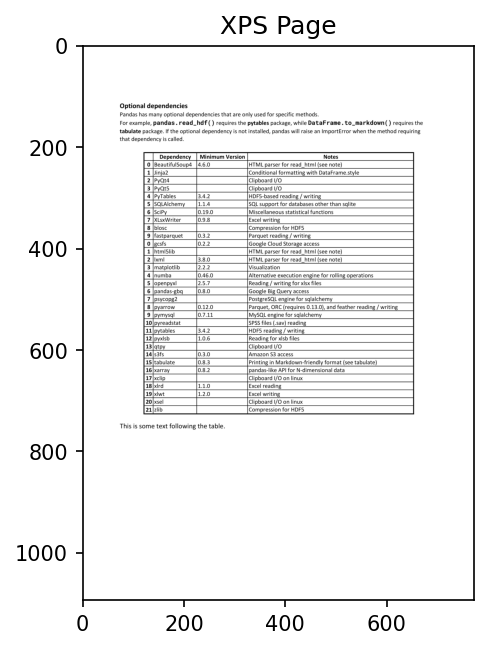

In [14]:
from show_image import show_image
show_image(xps_page, "XPS Page")

And here is the generated pandas DataFrame for the table:

In [15]:
xps_df

,Col0,Dependency,Minimum Version,Notes
0,0,BeautifulSoup4,4.6.0,HTML parser for read_html (see note)
1,1,Jinja2,,Conditional formatting with DataFrame.style
2,2,PyQt4,,Clipboard I/O
3,3,PyQt5,,Clipboard I/O
4,4,PyTables,3.4.2,HDF5-based reading / writing
5,5,SQLAlchemy,1.1.4,SQL support for databases other than sqlite
6,6,SciPy,0.19.0,Miscellaneous statistical functions
7,7,XLsxWriter,0.9.8,Excel writing
8,8,blosc,,Compression for HDF5
9,9,fastparquet,0.3.2,Parquet reading / writing
